!!!!!!!!!! 这个notebook里所有的exon_ids列都是每个转录本做K36时用的tail 2/3 exon，不是上一步筛选到的maternal specific exon

# TPM > 6, TPM < 0.8

# load modules

In [1]:
import subprocess
import os
import numpy as np
import pandas as pd
import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42
mpl.rcParams['font.sans-serif'] = 'Arial'
import matplotlib.pyplot as plt
import seaborn as sns
from pprint import pprint
from matplotlib.backends.backend_pdf import PdfPages
%matplotlib inline

In [2]:
import bs4 as bs
import urllib
import requests

In [3]:
import json

# annotation

In [12]:
finame = '/mnt/Storage/home/wangyiman/source/bySpecies/danRer11_2/ensGene/danRer11_2.ensGene.genePredExt'
tr_gene_pd = pd.read_table(finame, header=None, sep="\t", encoding="utf-8")
tr_gene_pd = tr_gene_pd.iloc[:,[0,11]]
tr_gene_pd.columns = ['transcript_id', 'gene_id']
finame = '/mnt/Storage/home/wangyiman/source/bySpecies/danRer11_2/ensGene/danRer11.ensGeneToGeneSymbol.txt'
gene_symbol_pd = pd.read_table(finame, header=None, sep="\t", encoding="utf-8")
gene_symbol_pd.columns = ['gene_id', 'gene_symbol']
tr_gene_symbol_pd = pd.merge(tr_gene_pd, gene_symbol_pd, on="gene_id")
tr_gene_symbol_pd.head()

,transcript_id,gene_id,gene_symbol
0,ENSDART00000164359.1,ENSDARG00000099104.1,rpl24
1,ENSDART00000158290.1,ENSDARG00000099104.1,rpl24
2,ENSDART00000157701.1,ENSDARG00000099104.1,rpl24
3,ENSDART00000167898.1,ENSDARG00000099104.1,rpl24
4,ENSDART00000166393.1,ENSDARG00000102407.2,cep97


# read in filtered exons

In [10]:
expr_filtered_exon_gene_clean = pd.read_csv(
    '/mnt/Storage/home/wangyiman/maternal_loading/2.public_data/analysis_embryoExon_tissueExon/embryo_tissue_filtered_GeneIDSymbol_maxExpr_mean_high_corr_exonOver50.tsv',
                                                  sep = "\t",)
print(expr_filtered_exon_gene_clean.shape)
expr_filtered_exon_gene_clean = expr_filtered_exon_gene_clean.loc[(expr_filtered_exon_gene_clean['earlyEmbryo_expr'] > 6) & (expr_filtered_exon_gene_clean['lateEmbryoTissue_expr'] < 0.8)]
expr_filtered_exon_gene_clean.to_csv(
    '/mnt/Storage/home/wangyiman/maternal_loading/2.public_data/analysis_embryoExon_tissueExon/embryo_tissue_filtered_GeneIDSymbol_maxExpr_mean_high_corr_exonOver50_TPM6_TPM0p8.tsv',
                                    )
expr_filtered_exon_gene_clean

(985, 5)


,exon_id,gene_id_clean,gene_symbol,earlyEmbryo_expr,lateEmbryoTissue_expr
2,ENSDART00000092324.5.7_ENSDART00000179970.1.7,ENSDARG00000063297,abcb6a,7.336979,0.602847
7,ENSDART00000140398.2.6,ENSDARG00000037739,zgc:112980,22.789256,0.626675
9,ENSDART00000146065.4.15_ENSDART00000114876.5.8,ENSDARG00000063169,ubn1,7.492041,0.583217
11,ENSDART00000131423.2.1_ENSDART00000146769.3.1_...,ENSDARG00000093886,tmsb5,128.124962,0.599977
12,ENSDART00000146769.3.2,ENSDARG00000093886,tmsb5,56.002764,0.233621
...,...,...,...,...,...
978,ENSDART00000154125.3_4.6,ENSDARG00000103283,si:dkey-238o14.7,9.170970,0.218887
979,ENSDART00000154125.3_4.11,ENSDARG00000103283,si:dkey-238o14.7,24.225576,0.740239
982,ENSDART00000154125.3_5.6,ENSDARG00000103283,si:dkey-238o14.7,13.285551,0.271359
983,ENSDART00000144849.3.3,ENSDARG00000095486,CU467646.2,27.489778,0.784810


In [18]:
len(expr_filtered_exon_gene_clean['gene_symbol'].unique())

393

# write out filtered trans

In [13]:
tr_gene_symbol_pd['gene_id_clean'] = tr_gene_symbol_pd['gene_id'].str.split('.', expand = True)[0]

In [14]:
pd.merge(expr_filtered_exon_gene_clean, tr_gene_symbol_pd, on = 'gene_id_clean').drop_duplicates().to_csv('/mnt/Storage/home/wangyiman/maternal_loading/2.public_data/H3K36me3/filtered_transcriptID_TPM6_TPM0p8.txt',
                                                                                                         sep = '\t', header = False, columns = ['transcript_id'], index = False)

In [16]:
%%bash
cd ~/maternal_loading/2.public_data/H3K36me3
sort filtered_transcriptID_TPM6_TPM0p8.txt | uniq > filtered_transcriptID_TPM6_TPM0p8.sorted.txt
wc -l filtered_transcriptID_TPM6_TPM0p8.sorted.txt

1073 filtered_transcriptID_TPM6_TPM0p8.sorted.txt


# H3K36me3 (dome)

In [19]:
%%bash
cd ~/maternal_loading/2.public_data/H3K36me3
file1=filtered_transcriptID_TPM6_TPM0p8.sorted.txt
file2=total_tail2of3_exon_H3K36me3_dome_RPKM.txt
awk 'BEGIN{FS=OFS="\t"}NR==FNR{a[$0];next}($1 in a)' $file1 $file2 > filtered_TPM6_TPM0p8_tail2of3_exon_H3K36me3_dome_RPKM.txt


In [18]:
filtered_tail2of3_exon_H3K36me3_dome_RPKM = pd.merge(tr_gene_symbol_pd, 
                                                      pd.read_table('/mnt/Storage/home/wangyiman/maternal_loading/2.public_data/H3K36me3/filtered_tail2of3_exon_H3K36me3_dome_RPKM.txt',
              sep = '\t', header = None, names = ['transcript_id','RPKM','Exon_ids','Strand','Len_2of3Exon','Chr']),
                                                                   on = 'transcript_id').drop_duplicates()
filtered_tail2of3_exon_H3K36me3_dome_RPKM

,transcript_id,gene_id,gene_symbol,gene_id_clean,RPKM,Exon_ids,Strand,Len_2of3Exon,Chr
0,ENSDART00000171547.1,ENSDARG00000102746.2,tmem39a,ENSDARG00000102746,0.354636,"ENSDART00000171547.1.1,ENSDART00000171547.1.2,...",-,976,chr1
1,ENSDART00000168091.1,ENSDARG00000102746.2,tmem39a,ENSDARG00000102746,0.254046,"ENSDART00000168091.1.1,ENSDART00000168091.1.2,...",-,1465,chr1
2,ENSDART00000164075.1,ENSDARG00000102746.2,tmem39a,ENSDARG00000102746,0.609956,"ENSDART00000164075.1.1,ENSDART00000164075.1.2,...",-,600,chr1
3,ENSDART00000170183.1,ENSDARG00000102746.2,tmem39a,ENSDARG00000102746,0.852736,"ENSDART00000170183.1.1,ENSDART00000170183.1.2,...",-,326,chr1
4,ENSDART00000165693.1,ENSDARG00000102746.2,tmem39a,ENSDARG00000102746,0.728300,"ENSDART00000165693.1.1,ENSDART00000165693.1.2,...",-,272,chr1
...,...,...,...,...,...,...,...,...,...
8812,ENSDART00000174249.2,ENSDARG00000095486.4,CU467646.2,ENSDARG00000095486,0.018104,"ENSDART00000174249.2.1,ENSDART00000174249.2.2,...",+,1726,chr4
8813,ENSDART00000144849.3,ENSDARG00000095486.4,CU467646.2,ENSDARG00000095486,0.026056,"ENSDART00000144849.3.1,ENSDART00000144849.3.2,...",+,506,chr4
8814,ENSDART00000174256.2,ENSDARG00000099076.3,CU467646.3,ENSDARG00000099076,0.002483,"ENSDART00000174256.2.1,ENSDART00000174256.2.2,...",+,1737,chr4
8815,ENSDART00000174256.2,ENSDARG00000099076.3,CU467646.3,ENSDARG00000099076,0.000000,"ENSDART00000174256.2_2.1,ENSDART00000174256.2_...",+,1736,chr4


!!!!!!!!!! 这个notebook里所有的exon_ids列都是每个转录本做K36时用的tail 2/3 exon，不是上一步筛选到的maternal specific exon

In [19]:
len(filtered_tail2of3_exon_H3K36me3_dome_RPKM['gene_symbol'].unique())

514

# Pol II (dome)

## mean signal over promoters

In [42]:
%%bash
cd ~/maternal_loading/2.public_data/analysis_embryoExon_tissueExon/pol2_signal
bwfi1=~/maternal_loading/2.public_data/ChIPseq/2_signal/ChIPseq_Pol2_dome_4H8.bw
bwfi2=~/maternal_loading/2.public_data/ChIPseq/2_signal/ChIPseq_Pol2_dome_8WG16.bw
bedfi=~/source/bySpecies/danRer11_2/ensGene/danRer11_2.ensGene.promoter.bed
bigWigAverageOverBed $bwfi1 $bedfi danRer11_2_promoters_pol2_dome_signal_4H8.tsv
bigWigAverageOverBed $bwfi2 $bedfi danRer11_2_promoters_pol2_dome_signal_8WG16.tsv


processing chromosomes
processing chromosomes


In [51]:
%%bash

function piling_up {
    fragment_length=`grep "predicted fragment length is" ../3_peak/${name}_MACS.out | cut -f 14 -d " "`
    ShiftSingleEnd.sh ${name}_reads.bed ${fragment_length} && \
    n=`wc -l ${name}_reads_shift.bed | cut -f 1 -d " "` && \
    c=`bc -l <<< "1000000 / $n"` && \
    genomeCoverageBed -bga -scale $c -i ${name}_reads_shift.bed -g ~/source/bySpecies/${genomeVersion}/chromSizes/${genomeVersion}_main.chrom.sizes > ${name}_reads_shift.bdg
}

cd ~/maternal_loading/2.public_data/ChIPseq/2_signal
genomeVersion=danRer11_2
name=ChIPseq_Pol2_dome_4H8
piling_up

In [ ]:
%%bash
cd ~/maternal_loading/2.public_data/ChIPseq/2_signal
bedtools intersect -a ChIPseq_Pol2_dome_4H8_reads_shift.bdg -b test.bed > test.bdg


The signal is equals to mean(1e6 / total_reads * read_cnt). (RPM)

In [52]:
test_df = pd.read_table('/mnt/Storage/home/wangyiman/maternal_loading/2.public_data/ChIPseq/2_signal/test.bdg', 
                       sep = '\t', header = None, )
test_df

,0,1,2,3
0,chr1,10026,10027,1.280230
1,chr1,10027,10029,1.140570
2,chr1,10029,10030,1.233680
3,chr1,10030,10031,1.303510
4,chr1,10031,10032,1.326780
...,...,...,...,...
632,chr1,13870,13932,0.000000
633,chr1,13932,13957,0.116384
634,chr1,13957,13969,0.162938
635,chr1,13969,13989,0.209492


In [53]:
test_df.apply(lambda x: x[3]*(x[2]-x[1]), axis = 1).sum()

2929.88549

In [55]:
2929.88549 / 4000

0.7324713725

## RPKM

In [57]:
%%bash
cd ~/maternal_loading/2.public_data/analysis_embryoExon_tissueExon/pol2_signal
file1=~/maternal_loading/2.public_data/H3K36me3/filtered_transcriptID.txt
file2=danRer11_2_promoters_pol2_dome_signal_4H8.tsv
file3=danRer11_2_promoters_pol2_dome_signal_8WG16.tsv
awk 'BEGIN{FS=OFS="\t"}NR==FNR{a[$0];next}($1 in a)' $file1 $file2 > filtered_pol2_dome_signal_4H8.tsv
awk 'BEGIN{FS=OFS="\t"}NR==FNR{a[$0];next}($1 in a)' $file1 $file3 > filtered_pol2_dome_signal_8WG16.tsv


In [22]:
filtered_pol2_signal_RPKM = {}
for k in ['4H8', '8WG16'] :
    filtered_pol2_signal_RPKM[k] = pd.merge(pd.read_table(f'/mnt/Storage/home/wangyiman/maternal_loading/2.public_data/analysis_embryoExon_tissueExon/pol2_signal/filtered_pol2_dome_signal_{k}.tsv',
                                                sep = '\t', header = None, names = ['transcript_id', 'size', 'covered', 'sum', 'mean0', 'mean']),
                                            tr_gene_symbol_pd, on = 'transcript_id'
                                           )
    filtered_pol2_signal_RPKM[k]['RPKM'] = filtered_pol2_signal_RPKM[k]['mean0'] / 4.0
    
    
filtered_pol2_signal_RPKM[k]

,transcript_id,size,covered,sum,mean0,mean,gene_id,gene_symbol,gene_id_clean,RPKM
0,ENSDART00000171547.1,4000,4000,2493.450,0.623362,0.623362,ENSDARG00000102746.2,tmem39a,ENSDARG00000102746,0.155840
1,ENSDART00000168091.1,4000,4000,2508.090,0.627022,0.627022,ENSDARG00000102746.2,tmem39a,ENSDARG00000102746,0.156755
2,ENSDART00000164075.1,4000,4000,2498.410,0.624601,0.624601,ENSDARG00000102746.2,tmem39a,ENSDARG00000102746,0.156150
3,ENSDART00000170183.1,4000,4000,2325.290,0.581323,0.581323,ENSDARG00000102746.2,tmem39a,ENSDARG00000102746,0.145331
4,ENSDART00000165693.1,4000,4000,2501.920,0.625481,0.625481,ENSDARG00000102746.2,tmem39a,ENSDARG00000102746,0.156370
...,...,...,...,...,...,...,...,...,...,...
1367,ENSDART00000135441.3,4000,4000,794.753,0.198688,0.198688,ENSDARG00000006600.10,lsm14aa,ENSDARG00000006600,0.049672
1368,ENSDART00000147093.2,4000,4000,926.876,0.231719,0.231719,ENSDARG00000006600.10,lsm14aa,ENSDARG00000006600,0.057930
1369,ENSDART00000152329.3,4000,4000,487.121,0.121780,0.121780,ENSDARG00000096603.3,bmb,ENSDARG00000096603,0.030445
1370,ENSDART00000152649.2,4000,4000,485.998,0.121499,0.121499,ENSDARG00000096603.3,bmb,ENSDARG00000096603,0.030375


In [23]:
candidate_pol2_signal_RPKM = {}
for k in ['4H8', '8WG16'] :
    candidate_pol2_signal_RPKM[k] = pd.merge(filtered_pol2_signal_RPKM[k], candidate_maternal_trid_geneid_sym, on = 'transcript_id').drop_duplicates()

candidate_pol2_signal_RPKM[k]['RPKM'].max()

0.096239

In [24]:
candidate_pol2_signal_RPKM['4H8']['RPKM'].idxmax()

20

In [25]:
candidate_pol2_signal_RPKM['4H8'].loc[20]

transcript_id    ENSDART00000024185.8
size                             4000
covered                          4000
sum                           2919.15
mean0                        0.729789
mean                         0.729789
gene_id_x        ENSDARG00000010332.8
gene_symbol_x               zgc:56231
gene_id_clean      ENSDARG00000010332
RPKM                         0.182447
gene_id_y        ENSDARG00000010332.8
gene_symbol_y               zgc:56231
Name: 20, dtype: object

# H3K36me3 & Pol2 filtering

In [26]:
# genes have 
k36_filtered_df = filtered_tail2of3_exon_H3K36me3_dome_RPKM.loc[filtered_tail2of3_exon_H3K36me3_dome_RPKM['RPKM'] < .2].drop_duplicates()
pol2_filtered_df_4H8 = filtered_pol2_signal_RPKM['4H8'].loc[filtered_pol2_signal_RPKM['4H8']['RPKM'] < .2].drop_duplicates()
pol2_filtered_df_8WG16 = filtered_pol2_signal_RPKM['8WG16'].loc[filtered_pol2_signal_RPKM['8WG16']['RPKM'] < .2].drop_duplicates()
k36_pol24H8_filtered = pd.merge(k36_filtered_df, pol2_filtered_df_4H8, on = ['transcript_id', 'gene_id', 'gene_symbol', 'gene_id_clean'], how = 'inner')
k36_pol24H88WG16_filtered = pd.merge(k36_pol24H8_filtered, pol2_filtered_df_8WG16, on = ['transcript_id', 'gene_id', 'gene_symbol', 'gene_id_clean'], how = 'inner')
k36_pol24H88WG16_filtered

,transcript_id,gene_id,gene_symbol,gene_id_clean,RPKM_x,Exon_ids,Strand,Len_2of3Exon,Chr,size_x,...,sum_x,mean0_x,mean_x,RPKM_y,size_y,covered_y,sum_y,mean0_y,mean_y,RPKM
0,ENSDART00000132385.2,ENSDARG00000058962.6,txnl4b,ENSDARG00000058962,0.097180,ENSDART00000132385.2.2,+,561,chr1,4000,...,328.693,0.082173,0.082173,0.020543,4000,4000,216.102,0.054025,0.054025,0.013506
1,ENSDART00000092324.5,ENSDARG00000063297.5,abcb6a,ENSDARG00000063297,0.093035,"ENSDART00000092324.5.10,ENSDART00000092324.5.1...",+,1953,chr1,4000,...,352.971,0.088243,0.088243,0.022061,4000,4000,358.039,0.089510,0.089510,0.022377
2,ENSDART00000179970.1,ENSDARG00000063297.5,abcb6a,ENSDARG00000063297,0.093421,"ENSDART00000179970.1.10,ENSDART00000179970.1.1...",+,1946,chr1,4000,...,354.926,0.088732,0.088732,0.022183,4000,4000,357.444,0.089361,0.089361,0.022340
3,ENSDART00000092058.6,ENSDARG00000058480.9,chtf18,ENSDARG00000058480,0.113385,"ENSDART00000092058.6.10,ENSDART00000092058.6.1...",+,2145,chr1,4000,...,186.425,0.046606,0.046606,0.011652,4000,4000,150.346,0.037587,0.037587,0.009397
4,ENSDART00000146065.4,ENSDARG00000063169.8,ubn1,ENSDARG00000063169,0.043447,"ENSDART00000146065.4.1,ENSDART00000146065.4.10...",-,1452,chr1,4000,...,388.119,0.097030,0.097030,0.024257,4000,4000,370.099,0.092525,0.092525,0.023131
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
964,ENSDART00000170059.2,ENSDARG00000112586.1,si:ch211-283l16.1,ENSDARG00000112586,0.020038,"ENSDART00000170059.2.1,ENSDART00000170059.2.2,...",+,1256,chr4,4000,...,551.685,0.137921,0.137921,0.034480,4000,4000,497.249,0.124312,0.124312,0.031078
965,ENSDART00000184455.1,ENSDARG00000112586.1,si:ch211-283l16.1,ENSDARG00000112586,0.031932,"ENSDART00000184455.1.1,ENSDART00000184455.1.2",+,716,chr4,4000,...,537.859,0.134465,0.134465,0.033616,4000,4000,455.648,0.113912,0.113912,0.028478
966,ENSDART00000166475.2,ENSDARG00000103458.3,znf1126,ENSDARG00000103458,0.024724,ENSDART00000166475.2.2,+,1291,chr4,4000,...,260.445,0.065111,0.065111,0.016278,4000,4000,195.450,0.048863,0.048863,0.012216
967,ENSDART00000174249.2,ENSDARG00000095486.4,CU467646.2,ENSDARG00000095486,0.018104,"ENSDART00000174249.2.1,ENSDART00000174249.2.2,...",+,1726,chr4,4000,...,239.100,0.059775,0.059775,0.014944,4000,4000,228.741,0.057185,0.057185,0.014296


In [27]:
len(k36_pol24H88WG16_filtered['gene_symbol'].unique())

429

In [28]:
len(k36_pol24H88WG16_filtered['transcript_id'].unique())

969

In [31]:
pd.DataFrame(k36_pol24H88WG16_filtered).to_csv(
    '/mnt/Storage/home/wangyiman/maternal_loading/2.public_data/jupyter_middle_files/make2_2_filterExon_byBath_CDD_K36_Pol2.k36_pol24H88WG16_filtered.txt',
    index = False, header = False, sep = "\t"
                                              )

# public list filtering

## ZGA genes

In [9]:
import os
danRer11_2_transcript_to_gene = {}

with open(os.path.expanduser('~wangwen/source/bySpecies/danRer11_2/danRer11_2.ensGene.genePredExt')) as fhd:
    for line in fhd:
        line = line.strip().split()
        danRer11_2_transcript_to_gene[line[0]]= line[11]

list(danRer11_2_transcript_to_gene.items())[:5]

[('ENSDART00000164359.1', 'ENSDARG00000099104.1'),
 ('ENSDART00000158290.1', 'ENSDARG00000099104.1'),
 ('ENSDART00000157701.1', 'ENSDARG00000099104.1'),
 ('ENSDART00000167898.1', 'ENSDARG00000099104.1'),
 ('ENSDART00000166393.1', 'ENSDARG00000102407.2')]

### nature 2013

In [10]:
nature_2013_genes = pd.read_csv(
    '/mnt/Storage/home/wangwen/project/fitCR/source/nature_2013_nature12632/41586_2013_BFnature12632_MOESM30_ESM.txt',
    skiprows=23,sep='\t')
nature_2013_genes.head()

,Gene_id,Symbol,Description,Adult_tissue_count,Meta_gene,Maternal_contr,Exon_length,Masked_intron_length,WT4_exon_rpkm,WT4_intron_rpkm,...,NS4_down,P4_down,PN4_down,PS4_down,PNS4_down,N6_down,NS6_down,P6_down,PS6_down,PNS6_down
0,ENSDARG00000000001,slc35a5,"solute carrier family 35, member A5",NaN,.,M,2478,4255,8.914,1.404,...,.,.,.,.,.,.,.,.,.,.
1,ENSDARG00000000002,ccdc80,coiled-coil domain containing 80,NaN,.,Z,3175,12250,0.232,0.000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ENSDARG00000000018,nrf1,nuclear respiratory factor 1,8.0,.,M,3074,13354,77.050,0.196,...,.,.,.,.,.,X,X,.,.,X
3,ENSDARG00000000019,ube2h,ubiquitin-conjugating enzyme E2H (UBC8 homolog...,8.0,.,M,3659,27485,37.676,0.217,...,.,.,.,.,.,X,X,.,.,X
4,ENSDARG00000000068,slc9a3r1,solute carrier family 9 (sodium/hydrogen excha...,8.0,.,M,2458,25261,31.587,0.003,...,.,.,.,.,.,.,.,.,.,.


In [11]:
first_wave_genes = set()
for index, row in nature_2013_genes.iterrows():
    if row['First_wave_5rpkm'] == 'X':
        first_wave_genes.add(row['Gene_id'])
print(len(first_wave_genes))


269


In [12]:
first_wave_genes_danRer11_2 = first_wave_genes & set(
    [x.split('.')[0] for x in danRer11_2_transcript_to_gene.values()])
print(len(first_wave_genes_danRer11_2))


196


In [116]:
# with open('/mnt/Storage/home/wangyiman/maternal_loading/2.public_data/analysis_embryoExon_tissueExon/public_ZGA_genes/first_wave_genes_danRer11_2.txt', 'w') as fhd:
#     for g in first_wave_genes_danRer11_2:
#         fhd.write(g+'\n')


### earlyZGA genes (cell rep 2014)

In [13]:
import os
earlyGA_genes = set(pd.read_csv(os.path.expanduser('/mnt/Storage/home/wangwen/project/fitCR/source/cellrep2014_4sUTP/genelist.txt'),header=None)[0])
earlyGA_genes_danRer11_2 =  earlyGA_genes & set(
    [x.split('.')[0] for x in danRer11_2_transcript_to_gene.values()])
print(len(earlyGA_genes_danRer11_2))


342


In [14]:
# with open('/mnt/Storage/home/wangyiman/maternal_loading/2.public_data/analysis_embryoExon_tissueExon/public_ZGA_genes/earlyZGA_genes_danRer11_2.txt', 'w') as fhd:
#     for g in earlyGA_genes_danRer11_2:
#         fhd.write(g+'\n')


### zygotic specific

In [15]:
zygotic_specific=set()
with open(os.path.expanduser('/mnt/Storage/home/wangwen/project/zebrafish_allelic/source/dev_095091_zygote_specific_gene.txt')) as fhd:
    for line in fhd:
        zygotic_specific.add(line.strip())
zygotic_specific_danRer11_2 = zygotic_specific & set(	
    [x.split('.')[0] for x in danRer11_2_transcript_to_gene.values()])

In [16]:
len(zygotic_specific_danRer11_2)

211

In [17]:
gene_ZGA = first_wave_genes_danRer11_2 | earlyGA_genes_danRer11_2 | zygotic_specific_danRer11_2
print(len(gene_ZGA))

603


In [20]:
pd.DataFrame(list(gene_ZGA)).to_csv('/mnt/Storage/home/wangyiman/maternal_loading/2.public_data/jupyter_middle_files/make2_2_filterExon_byBatch_CDD_K36_Pol2.gene_ZGA.txt',
                                   sep = "\t", index = False, header = False)

## ZGA genes filtering

In [32]:
list(gene_ZGA)[0:5]

['ENSDARG00000037178',
 'ENSDARG00000092337',
 'ENSDARG00000086445',
 'ENSDARG00000012632',
 'ENSDARG00000080493']

In [33]:
k36_pol24H88WG16_ZGAgene_filtered = k36_pol24H88WG16_filtered.loc[~k36_pol24H88WG16_filtered['gene_id_clean'].isin(gene_ZGA)]

In [34]:
len(k36_pol24H88WG16_ZGAgene_filtered['transcript_id'].unique())

952

In [35]:
len(k36_pol24H88WG16_ZGAgene_filtered['gene_symbol'].unique())

415

In [43]:
len(k36_pol24H88WG16_filtered['gene_id_clean'].unique())

436

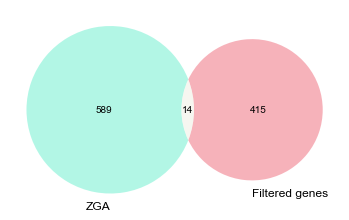

In [65]:
### venn 
from matplotlib_venn import venn2
from matplotlib_venn._common import mix_colors
from matplotlib.colors import ColorConverter

a = len(gene_ZGA)
b = len(k36_pol24H88WG16_filtered['gene_symbol'].unique())
intersect = k36_pol24H88WG16_filtered.loc[k36_pol24H88WG16_filtered['gene_id_clean'].isin(gene_ZGA)]['gene_id_clean'].unique().shape[0]

v = venn2((a - intersect, b - intersect, intersect),
          alpha=.5,
          set_colors = ['#66EFCD', '#EF6677'],
          set_labels=('ZGA', 'Filtered genes'))
plt.savefig('/mnt/Storage/home/wangyiman/maternal_loading/2.public_data/figures/make2_2_venn_gene_ZGA.pdf', transparent=True)

In [36]:
k36_pol24H88WG16_ZGAgene_filtered['transcript_id'].head()

0    ENSDART00000132385.2
1    ENSDART00000092324.5
2    ENSDART00000179970.1
3    ENSDART00000092058.6
4    ENSDART00000146065.4
Name: transcript_id, dtype: object

In [218]:
k36_pol24H88WG16_ZGAgene_filtered.loc[k36_pol24H88WG16_ZGAgene_filtered['gene_symbol'].isin(candidate_maternal_gene_ls)]['gene_symbol'].unique()

array(['si:ch211-286b5.4', 'zgc:152977', 'ftr81', 'zgc:165514',
       'si:dkey-208k4.2', 'si:ch211-119o8.6', 'mcm6l', 'mcm3l', 'lmx1a',
       'zgc:114123', 'kank1b', 'zglp1', 'orc1', 'zgc:56231', 'npm2a'],
      dtype=object)

In [72]:
k36_pol24H88WG16_ZGAgene_filtered

,transcript_id,gene_id,gene_symbol,gene_id_clean,RPKM_x,Exon_ids,Strand,Len_2of3Exon,Chr,size_x,...,sum_x,mean0_x,mean_x,RPKM_y,size_y,covered_y,sum_y,mean0_y,mean_y,RPKM
0,ENSDART00000132385.2,ENSDARG00000058962.6,txnl4b,ENSDARG00000058962,0.097180,ENSDART00000132385.2.2,+,561,chr1,4000,...,328.693,0.082173,0.082173,0.020543,4000,4000,216.102,0.054025,0.054025,0.013506
1,ENSDART00000092324.5,ENSDARG00000063297.5,abcb6a,ENSDARG00000063297,0.093035,"ENSDART00000092324.5.10,ENSDART00000092324.5.1...",+,1953,chr1,4000,...,352.971,0.088243,0.088243,0.022061,4000,4000,358.039,0.089510,0.089510,0.022377
2,ENSDART00000179970.1,ENSDARG00000063297.5,abcb6a,ENSDARG00000063297,0.093421,"ENSDART00000179970.1.10,ENSDART00000179970.1.1...",+,1946,chr1,4000,...,354.926,0.088732,0.088732,0.022183,4000,4000,357.444,0.089361,0.089361,0.022340
3,ENSDART00000092058.6,ENSDARG00000058480.9,chtf18,ENSDARG00000058480,0.113385,"ENSDART00000092058.6.10,ENSDART00000092058.6.1...",+,2145,chr1,4000,...,186.425,0.046606,0.046606,0.011652,4000,4000,150.346,0.037587,0.037587,0.009397
4,ENSDART00000146065.4,ENSDARG00000063169.8,ubn1,ENSDARG00000063169,0.043447,"ENSDART00000146065.4.1,ENSDART00000146065.4.10...",-,1452,chr1,4000,...,388.119,0.097030,0.097030,0.024257,4000,4000,370.099,0.092525,0.092525,0.023131
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
964,ENSDART00000170059.2,ENSDARG00000112586.1,si:ch211-283l16.1,ENSDARG00000112586,0.020038,"ENSDART00000170059.2.1,ENSDART00000170059.2.2,...",+,1256,chr4,4000,...,551.685,0.137921,0.137921,0.034480,4000,4000,497.249,0.124312,0.124312,0.031078
965,ENSDART00000184455.1,ENSDARG00000112586.1,si:ch211-283l16.1,ENSDARG00000112586,0.031932,"ENSDART00000184455.1.1,ENSDART00000184455.1.2",+,716,chr4,4000,...,537.859,0.134465,0.134465,0.033616,4000,4000,455.648,0.113912,0.113912,0.028478
966,ENSDART00000166475.2,ENSDARG00000103458.3,znf1126,ENSDARG00000103458,0.024724,ENSDART00000166475.2.2,+,1291,chr4,4000,...,260.445,0.065111,0.065111,0.016278,4000,4000,195.450,0.048863,0.048863,0.012216
967,ENSDART00000174249.2,ENSDARG00000095486.4,CU467646.2,ENSDARG00000095486,0.018104,"ENSDART00000174249.2.1,ENSDART00000174249.2.2,...",+,1726,chr4,4000,...,239.100,0.059775,0.059775,0.014944,4000,4000,228.741,0.057185,0.057185,0.014296


In [77]:
k36_pol24H88WG16_ZGAgene_filtered['Exon_ids'].tolist()[:5]

['ENSDART00000132385.2.2',
 'ENSDART00000092324.5.10,ENSDART00000092324.5.11,ENSDART00000092324.5.12,ENSDART00000092324.5.13,ENSDART00000092324.5.14,ENSDART00000092324.5.15,ENSDART00000092324.5.16,ENSDART00000092324.5.17,ENSDART00000092324.5.18,ENSDART00000092324.5.19,ENSDART00000092324.5.20,ENSDART00000092324.5.4,ENSDART00000092324.5.5,ENSDART00000092324.5.6,ENSDART00000092324.5.7,ENSDART00000092324.5.8,ENSDART00000092324.5.9',
 'ENSDART00000179970.1.10,ENSDART00000179970.1.11,ENSDART00000179970.1.12,ENSDART00000179970.1.13,ENSDART00000179970.1.14,ENSDART00000179970.1.15,ENSDART00000179970.1.16,ENSDART00000179970.1.17,ENSDART00000179970.1.18,ENSDART00000179970.1.19,ENSDART00000179970.1.20,ENSDART00000179970.1.4,ENSDART00000179970.1.5,ENSDART00000179970.1.6,ENSDART00000179970.1.7,ENSDART00000179970.1.8,ENSDART00000179970.1.9',
 'ENSDART00000092058.6.10,ENSDART00000092058.6.11,ENSDART00000092058.6.12,ENSDART00000092058.6.13,ENSDART00000092058.6.14,ENSDART00000092058.6.15,ENSDART00000092

In [101]:
k36_pol24H88WG16_ZGAgene_filtered_exons = pd.merge(k36_pol24H88WG16_ZGAgene_filtered, pd.merge(expr_filtered_exon_gene_clean, tr_gene_symbol_pd, on = 'gene_id_clean').drop_duplicates(), on = 'transcript_id')[['exon_id', 'gene_id_clean_x', 'transcript_id', 'gene_symbol']].drop_duplicates()
k36_pol24H88WG16_ZGAgene_filtered_exons.to_csv(
    '/mnt/Storage/home/wangyiman/maternal_loading/2.public_data/jupyter_middle_files/make2_2_filterExon_byBatch_CDD_K36_Pol2.k36_pol24H88WG16_ZGAgene_filtered_exons.tsv',
    sep = "\t", index = False
                                              )

In [102]:
k36_pol24H88WG16_ZGAgene_filtered_exons

,exon_id,gene_id_clean_x,transcript_id,gene_symbol
0,ENSDART00000109083.5.1,ENSDARG00000058962,ENSDART00000132385.2,txnl4b
1,ENSDART00000092324.5.7_ENSDART00000179970.1.7,ENSDARG00000063297,ENSDART00000092324.5,abcb6a
2,ENSDART00000092324.5.10_ENSDART00000179970.1.10,ENSDARG00000063297,ENSDART00000092324.5,abcb6a
3,ENSDART00000092324.5.13_ENSDART00000179970.1.13,ENSDARG00000063297,ENSDART00000092324.5,abcb6a
4,ENSDART00000092324.5.7_ENSDART00000179970.1.7,ENSDARG00000063297,ENSDART00000179970.1,abcb6a
...,...,...,...,...
2010,ENSDART00000170059.2.1,ENSDARG00000112586,ENSDART00000170059.2,si:ch211-283l16.1
2011,ENSDART00000170059.2.1,ENSDARG00000112586,ENSDART00000184455.1,si:ch211-283l16.1
2012,ENSDART00000166475.2.1,ENSDARG00000103458,ENSDART00000166475.2,znf1126
2013,ENSDART00000144849.3.3,ENSDARG00000095486,ENSDART00000174249.2,CU467646.2


In [92]:
len(k36_pol24H88WG16_ZGAgene_filtered_exons['gene_id_clean_x'].unique())

422

# CDD

In [ ]:
new : QM3-qcdsearch-2C72BD96E16B5852

In [ ]:
old : QM3-qcdsearch-3AB3484012D76097

## gene_symbol to protein sequence

In [245]:
import json
import bs4 as bs
import urllib
import requests
def factorTouid(factor_name, species):
    """query factor to get uniprot id and other contents"""
    # factor_name = "FUS"
    # species = "human"
    if factor_name == "T":
        factor_name = "TBXT"
    if species == "human":
        url_query = "https://www.uniprot.org/uniprot/?query={0}+AND+{1}&sort=score" . format(factor_name.upper(), species) # query factor
    elif species == "mouse":
        url_query = "https://www.uniprot.org/uniprot/?query={0}+AND+{1}&sort=score" . format(factor_name.lower(), species) # query factor
    elif species == "zebrafish":
        factor_name1 = factor_name.split('.')[0] if factor_name[:3] == 'si:' else factor_name
        url_query = "https://www.uniprot.org/uniprot/?query={0}+AND+{1}&sort=score" . format(factor_name1.lower(), species) # query factor
        species2 = 'danre'
        
    print(url_query)
    flag = 0
    try:
        sauce = requests.get(url_query, timeout = 30)
        soup = bs.BeautifulSoup(sauce.content,'html.parser')
        table_results = soup.find(id = "results")
        tbody = table_results.find("tbody")
        trs = tbody.find_all("tr")
        tds_true = None
        for tr in trs:
            tds = tr.find_all("td")
            review = tds[3].find("div").get("title")
            entry_name = tds[2].get_text().upper() # e.g. SMC3_HUMAN
            gene_name = tds[5].get_text().upper().replace(" ", "$").replace(",", "$") + "$" # gene symbol alias (SMC3 BAM, BMH, CSPG6, SMC3L1)
            if ("%s_"%(factor_name.upper()) in entry_name or "%s"%(factor_name.upper()) in gene_name) and species2.upper() in entry_name:
                tds_true = tds
                break
                
        if tds_true:     
            return(np.array([td.get_text() for td in tds_true])[[1,2,5]])
        else:
            return(np.array(["None"] * 3))

    except:
        # print(factor_name)
        return(np.array(["None"] * 3))
    
def uidTofasta(uid):
    """download protein aa sequence for given uid"""
    fasta_url = "https://www.uniprot.org/uniprot/{0}.fasta" . format(uid)
    fasta_file_name = "{0}.fasta" . format(uid)
    urllib.request.urlretrieve(fasta_url, fasta_file_name)

In [132]:
k36_pol24H88WG16_ZGAgene_filtered

,transcript_id,gene_id,gene_symbol,gene_id_clean,RPKM_x,Exon_ids,Strand,Len_2of3Exon,Chr,size_x,...,sum_x,mean0_x,mean_x,RPKM_y,size_y,covered_y,sum_y,mean0_y,mean_y,RPKM
0,ENSDART00000132385.2,ENSDARG00000058962.6,txnl4b,ENSDARG00000058962,0.097180,ENSDART00000132385.2.2,+,561,chr1,4000,...,328.693,0.082173,0.082173,0.020543,4000,4000,216.102,0.054025,0.054025,0.013506
1,ENSDART00000092324.5,ENSDARG00000063297.5,abcb6a,ENSDARG00000063297,0.093035,"ENSDART00000092324.5.10,ENSDART00000092324.5.1...",+,1953,chr1,4000,...,352.971,0.088243,0.088243,0.022061,4000,4000,358.039,0.089510,0.089510,0.022377
2,ENSDART00000179970.1,ENSDARG00000063297.5,abcb6a,ENSDARG00000063297,0.093421,"ENSDART00000179970.1.10,ENSDART00000179970.1.1...",+,1946,chr1,4000,...,354.926,0.088732,0.088732,0.022183,4000,4000,357.444,0.089361,0.089361,0.022340
3,ENSDART00000092058.6,ENSDARG00000058480.9,chtf18,ENSDARG00000058480,0.113385,"ENSDART00000092058.6.10,ENSDART00000092058.6.1...",+,2145,chr1,4000,...,186.425,0.046606,0.046606,0.011652,4000,4000,150.346,0.037587,0.037587,0.009397
4,ENSDART00000146065.4,ENSDARG00000063169.8,ubn1,ENSDARG00000063169,0.043447,"ENSDART00000146065.4.1,ENSDART00000146065.4.10...",-,1452,chr1,4000,...,388.119,0.097030,0.097030,0.024257,4000,4000,370.099,0.092525,0.092525,0.023131
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
964,ENSDART00000170059.2,ENSDARG00000112586.1,si:ch211-283l16.1,ENSDARG00000112586,0.020038,"ENSDART00000170059.2.1,ENSDART00000170059.2.2,...",+,1256,chr4,4000,...,551.685,0.137921,0.137921,0.034480,4000,4000,497.249,0.124312,0.124312,0.031078
965,ENSDART00000184455.1,ENSDARG00000112586.1,si:ch211-283l16.1,ENSDARG00000112586,0.031932,"ENSDART00000184455.1.1,ENSDART00000184455.1.2",+,716,chr4,4000,...,537.859,0.134465,0.134465,0.033616,4000,4000,455.648,0.113912,0.113912,0.028478
966,ENSDART00000166475.2,ENSDARG00000103458.3,znf1126,ENSDARG00000103458,0.024724,ENSDART00000166475.2.2,+,1291,chr4,4000,...,260.445,0.065111,0.065111,0.016278,4000,4000,195.450,0.048863,0.048863,0.012216
967,ENSDART00000174249.2,ENSDARG00000095486.4,CU467646.2,ENSDARG00000095486,0.018104,"ENSDART00000174249.2.1,ENSDART00000174249.2.2,...",+,1726,chr4,4000,...,239.100,0.059775,0.059775,0.014944,4000,4000,228.741,0.057185,0.057185,0.014296


In [133]:
len(k36_pol24H88WG16_ZGAgene_filtered['gene_symbol'].unique())

415

In [134]:
k36_pol24H88WG16_ZGAgene_filtered['gene_symbol'].unique().tolist()

['txnl4b',
 'abcb6a',
 'chtf18',
 'ubn1',
 'micall2b',
 'tmsb5',
 'uchl1',
 'cldng',
 'lmo7b',
 'zgc:152968',
 'si:ch73-90k17.1',
 'si:ch211-214c7.4',
 'setd4',
 'zp3c',
 'gstcd',
 'patl1',
 'si:ch211-286b5.4',
 'cdc37l1',
 'si:dkey-88l16.5',
 'trappc13',
 'pigo',
 'golga7',
 'avd',
 'zgc:165539',
 'kpna7',
 'fhdc3',
 'zgc:153345',
 'b3glctb',
 'ccna1',
 'prr11',
 'brf2',
 'CU326366.2',
 'scarb1',
 'CU914760.1',
 'acap3b',
 'larp6b',
 'ect2',
 'zgc:175135',
 'zgc:173545',
 'LO018315.6',
 'ccdc120',
 'st3gal8',
 'BX548000.1',
 'CR790368.1',
 'sh2d5',
 'map1lc3c',
 'tmem101',
 'ca15b',
 'prdm9',
 'zgc:152977',
 'patl2',
 'drosha',
 'buc2l',
 'st6galnac1.2',
 'BX004803.1',
 'cdca9',
 'kcnk1a',
 'twnk',
 'abca5',
 'zgc:111868',
 'ush1gb',
 'eloal',
 'ninl',
 'BX511166.1',
 'mxtx1',
 'supv3l1',
 'cuedc2',
 'ftr81',
 'tacc3',
 'nin',
 'si:dkey-188i13.11',
 'si:dkeyp-4c7.3',
 'zgc:123010',
 'vent',
 'rgs14a',
 'rufy1',
 'dnd1',
 'RF01848',
 'CR382326.1',
 'tcirg1b',
 'CCDC69',
 'phf6',
 'zdhh

In [246]:
# list_zebrafish_factor_annotation = []
# for factor in early_expr_tf_df['Symbol'].unique().tolist() :
#     print(factor)
#     list_zebrafish_factor_annotation.append(np.concatenate([np.array([factor]), factorTouid(factor, "zebrafish")]))


list_zebrafish_factor_annotation = []
# for factor in ['.'.join(x.split('.')[:-1]) if x[:3]=='si:' else x for x in k36_pol24H88WG16_ZGAgene_filtered['gene_symbol'].unique().tolist()] :
for factor in k36_pol24H88WG16_ZGAgene_filtered['gene_symbol'].unique().tolist() :
    print(factor)
    list_zebrafish_factor_annotation.append(np.concatenate([np.array([factor]), factorTouid(factor, "zebrafish")]))


txnl4b
https://www.uniprot.org/uniprot/?query=txnl4b+AND+zebrafish&sort=score
abcb6a
https://www.uniprot.org/uniprot/?query=abcb6a+AND+zebrafish&sort=score
chtf18
https://www.uniprot.org/uniprot/?query=chtf18+AND+zebrafish&sort=score
ubn1
https://www.uniprot.org/uniprot/?query=ubn1+AND+zebrafish&sort=score
micall2b
https://www.uniprot.org/uniprot/?query=micall2b+AND+zebrafish&sort=score
tmsb5
https://www.uniprot.org/uniprot/?query=tmsb5+AND+zebrafish&sort=score
uchl1
https://www.uniprot.org/uniprot/?query=uchl1+AND+zebrafish&sort=score
cldng
https://www.uniprot.org/uniprot/?query=cldng+AND+zebrafish&sort=score
lmo7b
https://www.uniprot.org/uniprot/?query=lmo7b+AND+zebrafish&sort=score
zgc:152968
https://www.uniprot.org/uniprot/?query=zgc:152968+AND+zebrafish&sort=score
si:ch73-90k17.1
https://www.uniprot.org/uniprot/?query=si:ch73-90k17+AND+zebrafish&sort=score
si:ch211-214c7.4
https://www.uniprot.org/uniprot/?query=si:ch211-214c7+AND+zebrafish&sort=score
setd4
https://www.uniprot.org/

In [278]:
factorTouid('si:ch211-286b5.4', "zebrafish")

https://www.uniprot.org/uniprot/?query=si:ch211-286b5+AND+zebrafish&sort=score


array(['R4GER7', 'R4GER7_DANRE', 'si:ch211-286b5.4 '], dtype='<U43')

In [471]:
# df_zebrafish_factor_annotation = pd.DataFrame(list_zebrafish_factor_annotation)
# df_zebrafish_factor_annotation.columns = ["factor", "uniprot_id", "uniprot_entry", "uniprot_alias"]
# # df_zebrafish_factor_annotation.to_csv("/mnt/Storage/home/wangyiman/early_embryo_network/analysis/early_expr_tf/early_expr_zebrafish_factor_uniprot.txt", header = True, index = False, sep = "\t")
# df_zebrafish_factor_annotation.loc[df_zebrafish_factor_annotation['uniprot_id']!='None'].to_csv("/mnt/Storage/home/wangyiman/maternal_loading/2.public_data/analysis_embryoExon_tissueExon/filtered_exons/filtered_exon_overlap10percentORF1000.unprot.txt", 
#                                       header = False, index = False, sep = "\t", columns = ['uniprot_id'])
# df_zebrafish_factor_annotation

In [247]:
df_zebrafish_factor_annotation = pd.DataFrame(list_zebrafish_factor_annotation)
df_zebrafish_factor_annotation.columns = ["factor", "uniprot_id", "uniprot_entry", "uniprot_alias"]
# df_zebrafish_factor_annotation.to_csv("/mnt/Storage/home/wangyiman/early_embryo_network/analysis/early_expr_tf/early_expr_zebrafish_factor_uniprot.txt", header = True, index = False, sep = "\t")
df_zebrafish_factor_annotation.loc[df_zebrafish_factor_annotation['uniprot_id']!='None'].to_csv("/mnt/Storage/home/wangyiman/maternal_loading/2.public_data/analysis_embryoExon_tissueExon/filtered_exons/filtered_exon.unprot.txt", 
                                      header = False, index = False, sep = "\t", columns = ['uniprot_id'])
df_zebrafish_factor_annotation

,factor,uniprot_id,uniprot_entry,uniprot_alias
0,txnl4b,Q3B728,Q3B728_DANRE,txnl4b zgc:123253
1,abcb6a,A9JTH5,A9JTH5_DANRE,abcb6a abcb6
2,chtf18,F1QF60,F1QF60_DANRE,chtf18
3,ubn1,A0A0J9YIW0,A0A0J9YIW0_DANRE,ubn1
4,micall2b,F1QAZ3,F1QAZ3_DANRE,micall2b
...,...,...,...,...
410,CR356227.1,None,None,None
411,znf993,A0A0J9YJE7,A0A0J9YJE7_DANRE,znf993
412,si:ch211-283l16.1,A0A0R4IJV9,A0A0R4IJV9_DANRE,si:ch211-283l16.1
413,znf1126,H0WF80,H0WF80_DANRE,znf1126


In [248]:
df_zebrafish_factor_annotation.loc[df_zebrafish_factor_annotation['factor'] == 'zgc:113424']

,factor,uniprot_id,uniprot_entry,uniprot_alias


In [249]:
df_zebrafish_factor_annotation.loc[df_zebrafish_factor_annotation['uniprot_id'] != 'None']

,factor,uniprot_id,uniprot_entry,uniprot_alias
0,txnl4b,Q3B728,Q3B728_DANRE,txnl4b zgc:123253
1,abcb6a,A9JTH5,A9JTH5_DANRE,abcb6a abcb6
2,chtf18,F1QF60,F1QF60_DANRE,chtf18
3,ubn1,A0A0J9YIW0,A0A0J9YIW0_DANRE,ubn1
4,micall2b,F1QAZ3,F1QAZ3_DANRE,micall2b
...,...,...,...,...
408,znf1063,F1R2M3,F1R2M3_DANRE,znf1063
409,zgc:173709,A8KBM3,A8KBM3_DANRE,si:dkey-156k2.3 zgc:173709
411,znf993,A0A0J9YJE7,A0A0J9YJE7_DANRE,znf993
412,si:ch211-283l16.1,A0A0R4IJV9,A0A0R4IJV9_DANRE,si:ch211-283l16.1


In [250]:
df_zebrafish_factor_annotation.loc[df_zebrafish_factor_annotation['uniprot_id'] == 'None']

,factor,uniprot_id,uniprot_entry,uniprot_alias
31,CU326366.2,None,None,None
33,CU914760.1,None,None,None
39,LO018315.6,None,None,None
42,BX548000.1,None,None,None
43,CR790368.1,None,None,None
54,BX004803.1,None,None,None
63,BX511166.1,None,None,None
70,si:dkey-188i13.11,None,None,None
77,RF01848,None,None,None
78,CR382326.1,None,None,None


The number of filtered genes having uniprot id is 373/415.

In [251]:
os.chdir('/mnt/Storage/home/wangyiman/maternal_loading/2.public_data/analysis_embryoExon_tissueExon/filtered_exons/fasta')
for uniprot_id in df_zebrafish_factor_annotation.loc[:, "uniprot_id"].values:
    if not os.path.isfile(f"{uniprot_id}.fasta"):
        if uniprot_id != "None":
            uidTofasta(uniprot_id)

In [253]:
%%bash
cd ~/maternal_loading/2.public_data/analysis_embryoExon_tissueExon/filtered_exons/fasta
cat R4GER7.fasta Q0P4F0.fasta A0A286Y945.fasta E7EY28.fasta A0A0R4IX80.fasta B0R169.fasta A0A0E4AYA7.fasta B8JKC1.fasta F6NUH5.fasta F1Q966.fasta F1QZZ7.fasta Q0P432.fasta Q7ZYW6.fasta Q7ZU82.fasta B0UYT8.fasta > ../candidate.fasta
cat *.fasta > ../total.fasta

In [219]:
%%bash
# cd ~/maternal_loading/2.public_data/analysis_embryoExon_tissueExon/filtered_exons/fasta
# QM3-qcdsearch-2916A463D0F7830D
# cat R4GE45.fasta B0R168.fasta Q0P4F0.fasta > ../candidate_notinHitdata.fasta 


The number of filtered genes having fasta is 369/415.

QM3-qcdsearch-1CE81AE744618408

In [257]:
hitdata_df = pd.read_table('/mnt/Storage/home/wangyiman/maternal_loading/2.public_data/analysis_embryoExon_tissueExon/filtered_exons/hitdata_superfamily.csv', 
             sep = "\t", header = 0, skiprows = range(7))
hitdata_df['summary'] = hitdata_df['Definition'].str.split(';', expand = True)[0]
hitdata_df['gene_symbol'] = hitdata_df['Query'].str.split('GN=', expand = True)[1].str.split(' ', expand = True)[0]

hitdata_df.head(1)

,Query,Hit type,PSSM-ID,From,To,E-Value,Bitscore,Accession,Short name,Incomplete,Superfamily,Definition,summary,gene_symbol
0,Q#1 - >tr|A0A0E4AYA7|A0A0E4AYA7_DANRE DNA repl...,superfamily,214631,116,651,0.0,675.517,cl33383,MCM superfamily,-,-,minichromosome maintenance proteins; minichrom...,minichromosome maintenance proteins,mcm6l


In [273]:
%%bash
cd ~/maternal_loading/2.public_data/analysis_embryoExon_tissueExon/filtered_exons

egrep 'chromatin|Chromatin|Chromosome|chromosome|DNA binding|DNA-binding|nucleo|Nucleo|transcription|zinc finger|Zn-finger' hitdata_superfamily.tsv > hitdata_superfamily_DNAbinding_chrom_nucleo.tsv

In [274]:
hitdata_df_filtered = pd.read_table('/mnt/Storage/home/wangyiman/maternal_loading/2.public_data/analysis_embryoExon_tissueExon/filtered_exons/hitdata_superfamily_DNAbinding_chrom_nucleo.tsv',
                                   sep = '\t', header = None, names = hitdata_df.columns)

hitdata_df_filtered['gene_symbol'] = hitdata_df_filtered['Query'].str.split('GN=', expand = True)[1].str.split(' ', expand = True)[0]
hitdata_df_filtered.head(1)

,Query,Hit type,PSSM-ID,From,To,E-Value,Bitscore,Accession,Short name,Incomplete,Superfamily,Definition,summary,gene_symbol
0,Q#1 - >tr|A0A0E4AYA7|A0A0E4AYA7_DANRE DNA repl...,superfamily,214631,116,651,0.0,675.517,cl33383,MCM superfamily,-,-,minichromosome maintenance proteins; minichrom...,NaN,mcm6l


Then filtered CDD manually

In [97]:
hitdata_df_filtered_manual = pd.read_excel('/mnt/Storage/home/wangyiman/maternal_loading/2.public_data/analysis_embryoExon_tissueExon/filtered_exons/hitdata_superfamily_DNAbinding_chrom_nucleo.filtered_manually_knownAndNewDomain.xlsx',)

hitdata_df_filtered_manual['gene_symbol'] = hitdata_df_filtered_manual['query'].str.split('GN=', expand = True)[1].str.split(' ', expand = True)[0]
hitdata_df_filtered_manual.head(1)

,query,query_number,Short name,class,Definition,gene_symbol
0,Q#1 - >tr|A0A0E4AYA7|A0A0E4AYA7_DANRE DNA repl...,Q#1,MCM superfamily,minichromosome maintenance,minichromosome maintenance proteins; minichrom...,mcm6l


In [99]:
len(hitdata_df_filtered_manual['gene_symbol'].unique().tolist())

73